In [34]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [57]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [2]:
#load the data

training_set = pd.read_csv('fashion-mnist_train.csv')
testing_set = pd.read_csv('fashion-mnist_test.csv')



In [12]:
#Preprocess the data 
# pixels values for each image
X_train = np.array(training_set.iloc[:,1:])
X_test = np.array(testing_set.iloc[:,1:])
X_train = X_train/255
X_test = X_test/255

#label for each image
y_train = to_categorical(np.array(training_set.iloc[:,0])) 
y_test = to_categorical(np.array(testing_set.iloc[:,0]))

In [59]:
# Building a first baseline model
pixel_numbers = X_train.shape[1]
number_of_classes = y_test.shape[1]
model = Sequential()
model.add(Dropout(0.2, input_shape=(pixel_numbers,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(number_of_classes, activation='softmax'))


In [60]:
# Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
# Training the model
batch_size = 150
epochs = 30
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 25s 409us/step - loss: 0.5687 - acc: 0.7936 - val_loss: 0.4170 - val_acc: 0.8470
Epoch 2/30
60000/60000 [==============================] - 22s 369us/step - loss: 0.4259 - acc: 0.8439 - val_loss: 0.3541 - val_acc: 0.8696
Epoch 3/30
60000/60000 [==============================] - 26s 432us/step - loss: 0.3921 - acc: 0.8575 - val_loss: 0.3499 - val_acc: 0.8711
Epoch 4/30
60000/60000 [==============================] - 23s 381us/step - loss: 0.3727 - acc: 0.8625 - val_loss: 0.3346 - val_acc: 0.8765
Epoch 5/30
60000/60000 [==============================] - 27s 445us/step - loss: 0.3553 - acc: 0.8676 - val_loss: 0.3274 - val_acc: 0.8736
Epoch 6/30
60000/60000 [==============================] - 25s 414us/step - loss: 0.3436 - acc: 0.8722 - val_loss: 0.3193 - val_acc: 0.8754
Epoch 7/30
60000/60000 [==============================] - 24s 394us/step - loss: 0.3354 - acc: 0.8743 - val_loss: 0.

In [62]:
# Evaluate the model 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.266599480122
Test accuracy: 0.9011


In [63]:
# Make predictions about the classes
predictions = model.predict_classes(X_test,batch_size=150)  


In [64]:
# Data Model visualization
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None

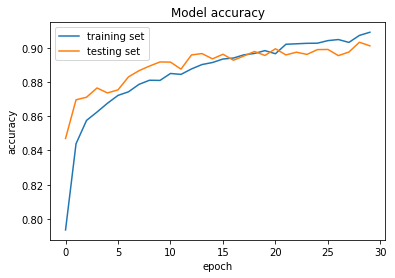

In [65]:
# Accuracy visualization
training_accuracy = history.history['acc']
testing_accuracy = history.history['val_acc']
plt.plot(training_accuracy)
plt.plot(testing_accuracy)
plt.title('Model accuracy')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

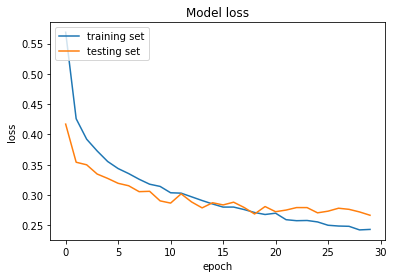

In [66]:
# Loss visualization

training_loss = history.history['loss']
testing_loss = history.history['val_loss']
plt.plot(training_loss)
plt.plot(testing_loss)
plt.title('Model loss')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()
